# WEB SCRAPPING WWW.HABITACLIA.COM CON SELENIUM

En este Notebook nos planteamos extraer, con la ayuda de Selenium, información de la web https://www.habitaclia.com.

Habitaclia es un portal web donde se concentran las ofertas de las diferentes agencias inmobiliarias españolas. Pone en contacto a compradores y vendedores sin cobrar comisión como intermediario del proceso contratista.

En su cartera online se pueden encontrar inmuebles de obra nueva, opción a compra, alquiler, arrendamiento de temporada o traspaso en toda España para viviendas, oficinas, locales comerciales, industriales, terrenos y solares, parkings, inversiones, inmuebles singulares y negocios.

Habitaclia es uno de los 3 portales inmobiliarios con más visitas mensuales en España, y es considerado por muchos como el número uno en la lista de los mejores portales inmobiliarios en Barcelona y Cataluña (según información del propio portal con 1,4 millones de visitas en Cataluña en 2021).

## PLANTEAMIENTO

Para nuestro proyecto, nos planteamos crear 2 datasets que recojan respectivamente las viviendas en venta y en alquiler en un momento dado en la ciudad de Barcelona, con el objetivo último de crear un modelo de machine learning que nos permita predecir el precio de venta y/o alquiler de una vivienda en función de sus características.

En este caso, accedemos al portal con la información actualizada a
en fecha 17 de abril del 2023.


## ANALISIS EXPLORATORIO DE LA WEB

Landind page de www.habitaclia.com

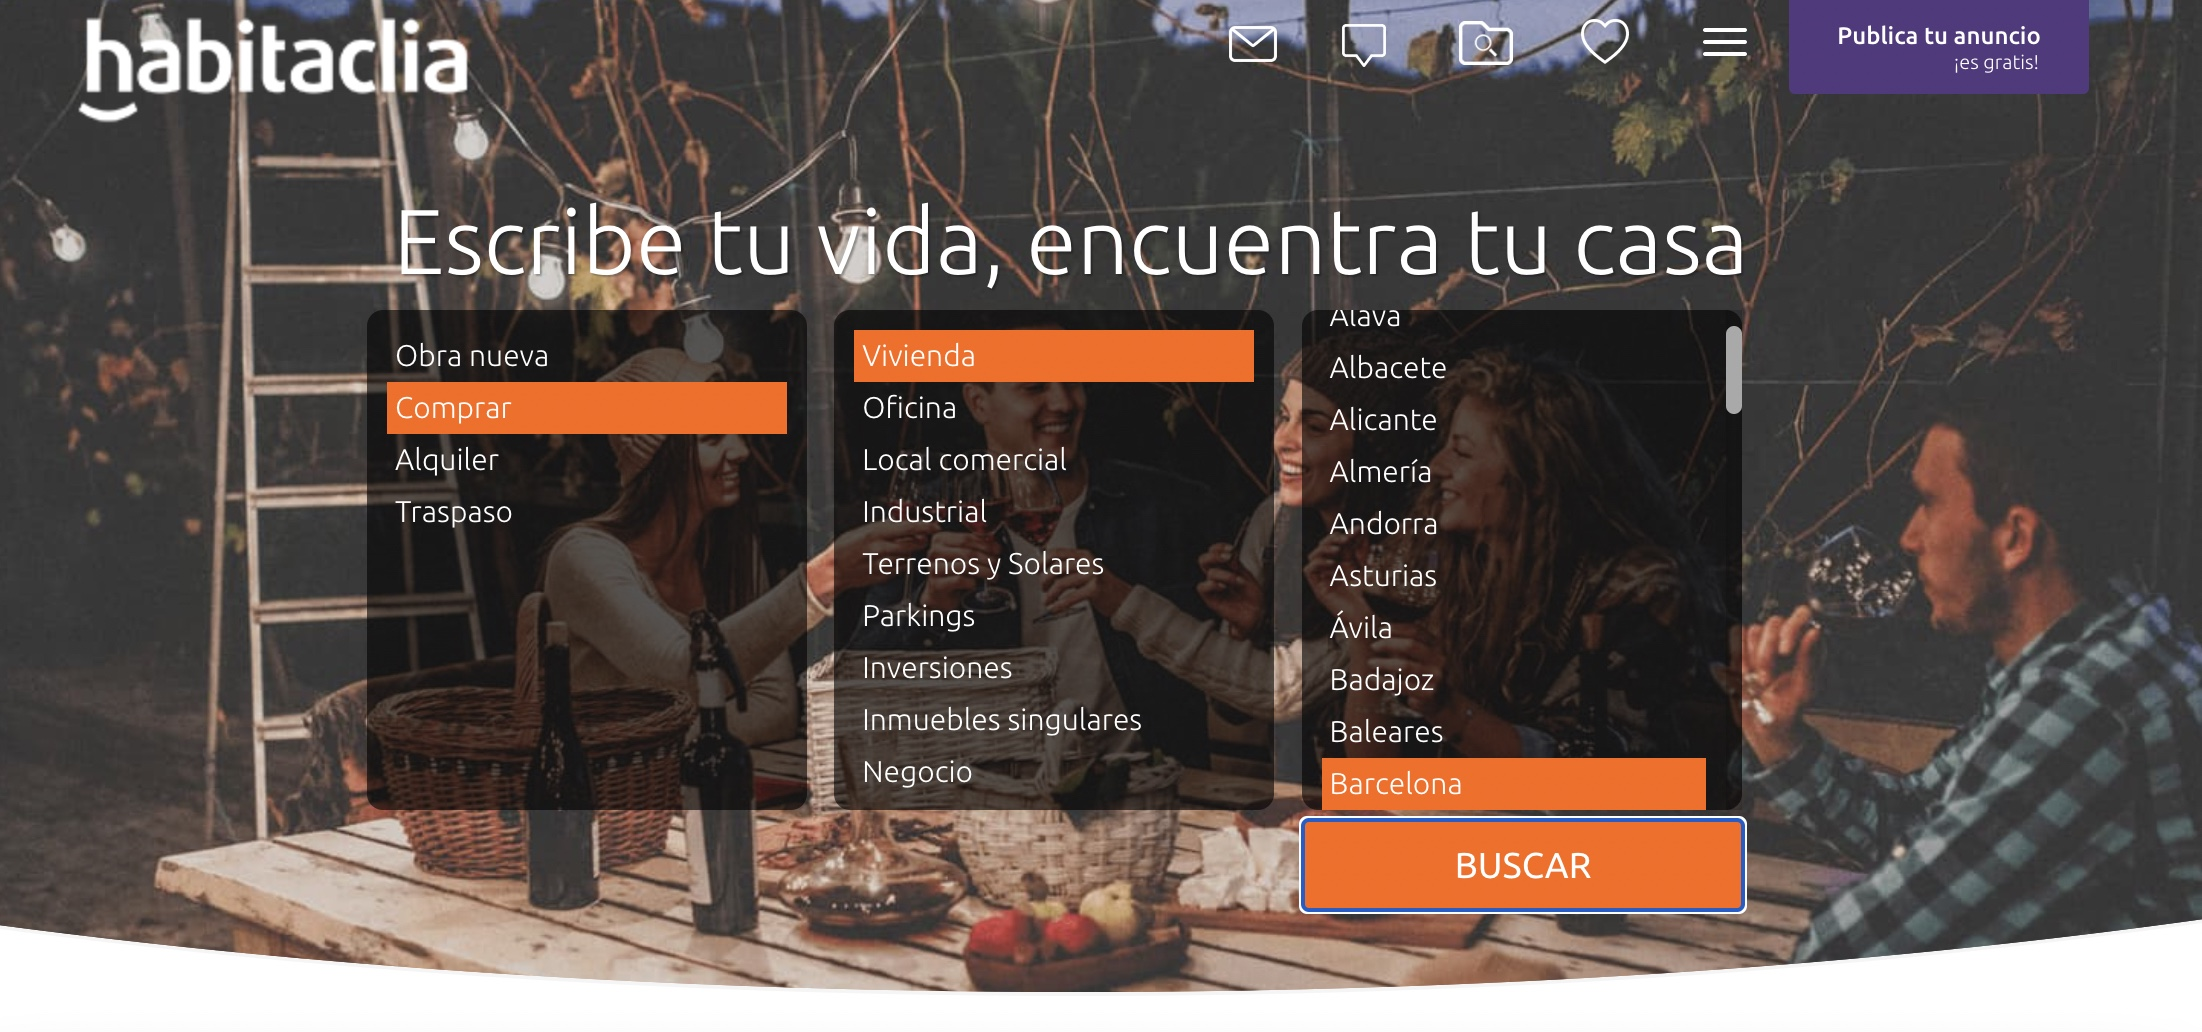

En el momento en el que realizamos la extracción de la información, Habitaclia anuncia 4486 viviendas en alquiler y 18753 viviendas a la venta. 

Dado el volumen de la información, descartamos acceder a la ficha individual de cada vivienda, sino que nos limitaremos a scrapear la información filtrada por distrito, siendo 10 los distritos de Barcelona : 
Ciutat Vella,Eixample,Gracia,Horta,les Corts,Nou Barris,Sant Andreu,Sant Marti,Sants-Montjuic,Sarria-Sant Gervasi.

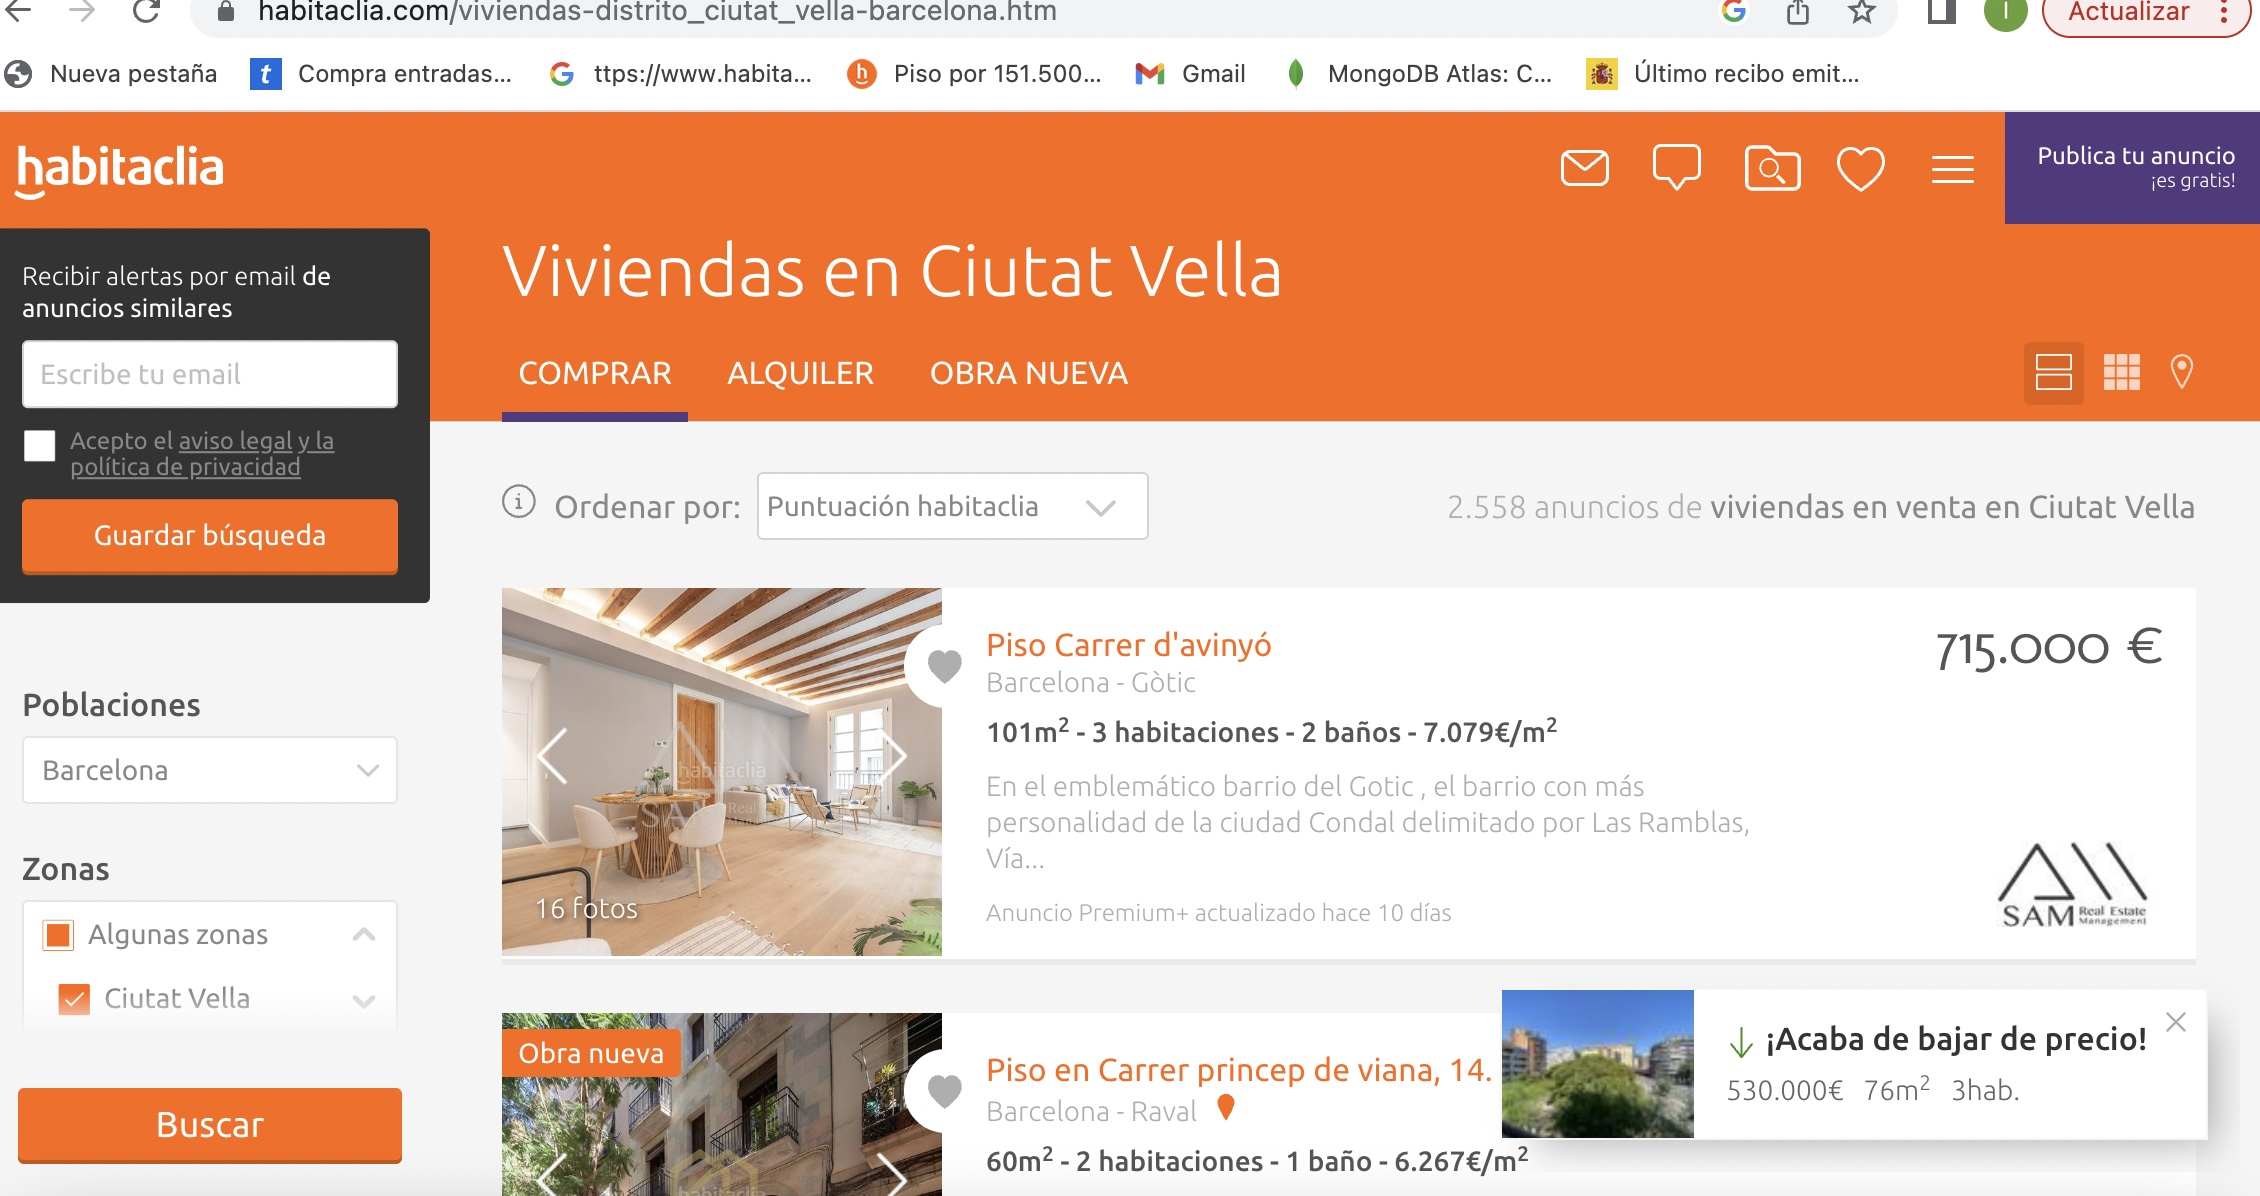

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np

In [2]:
driver=webdriver.Chrome()

## Scrapear las características de cada propiedad

La información relativa a cada anuncio está recogida en un elemento HTML de tipo artículo, el cual tiene una serie de atributos, y del cual cuelgan una serie de elementos entre los cuales encontramos la información de nuestro interés. Toda la información se localiza principalmente a través de su XPATH.

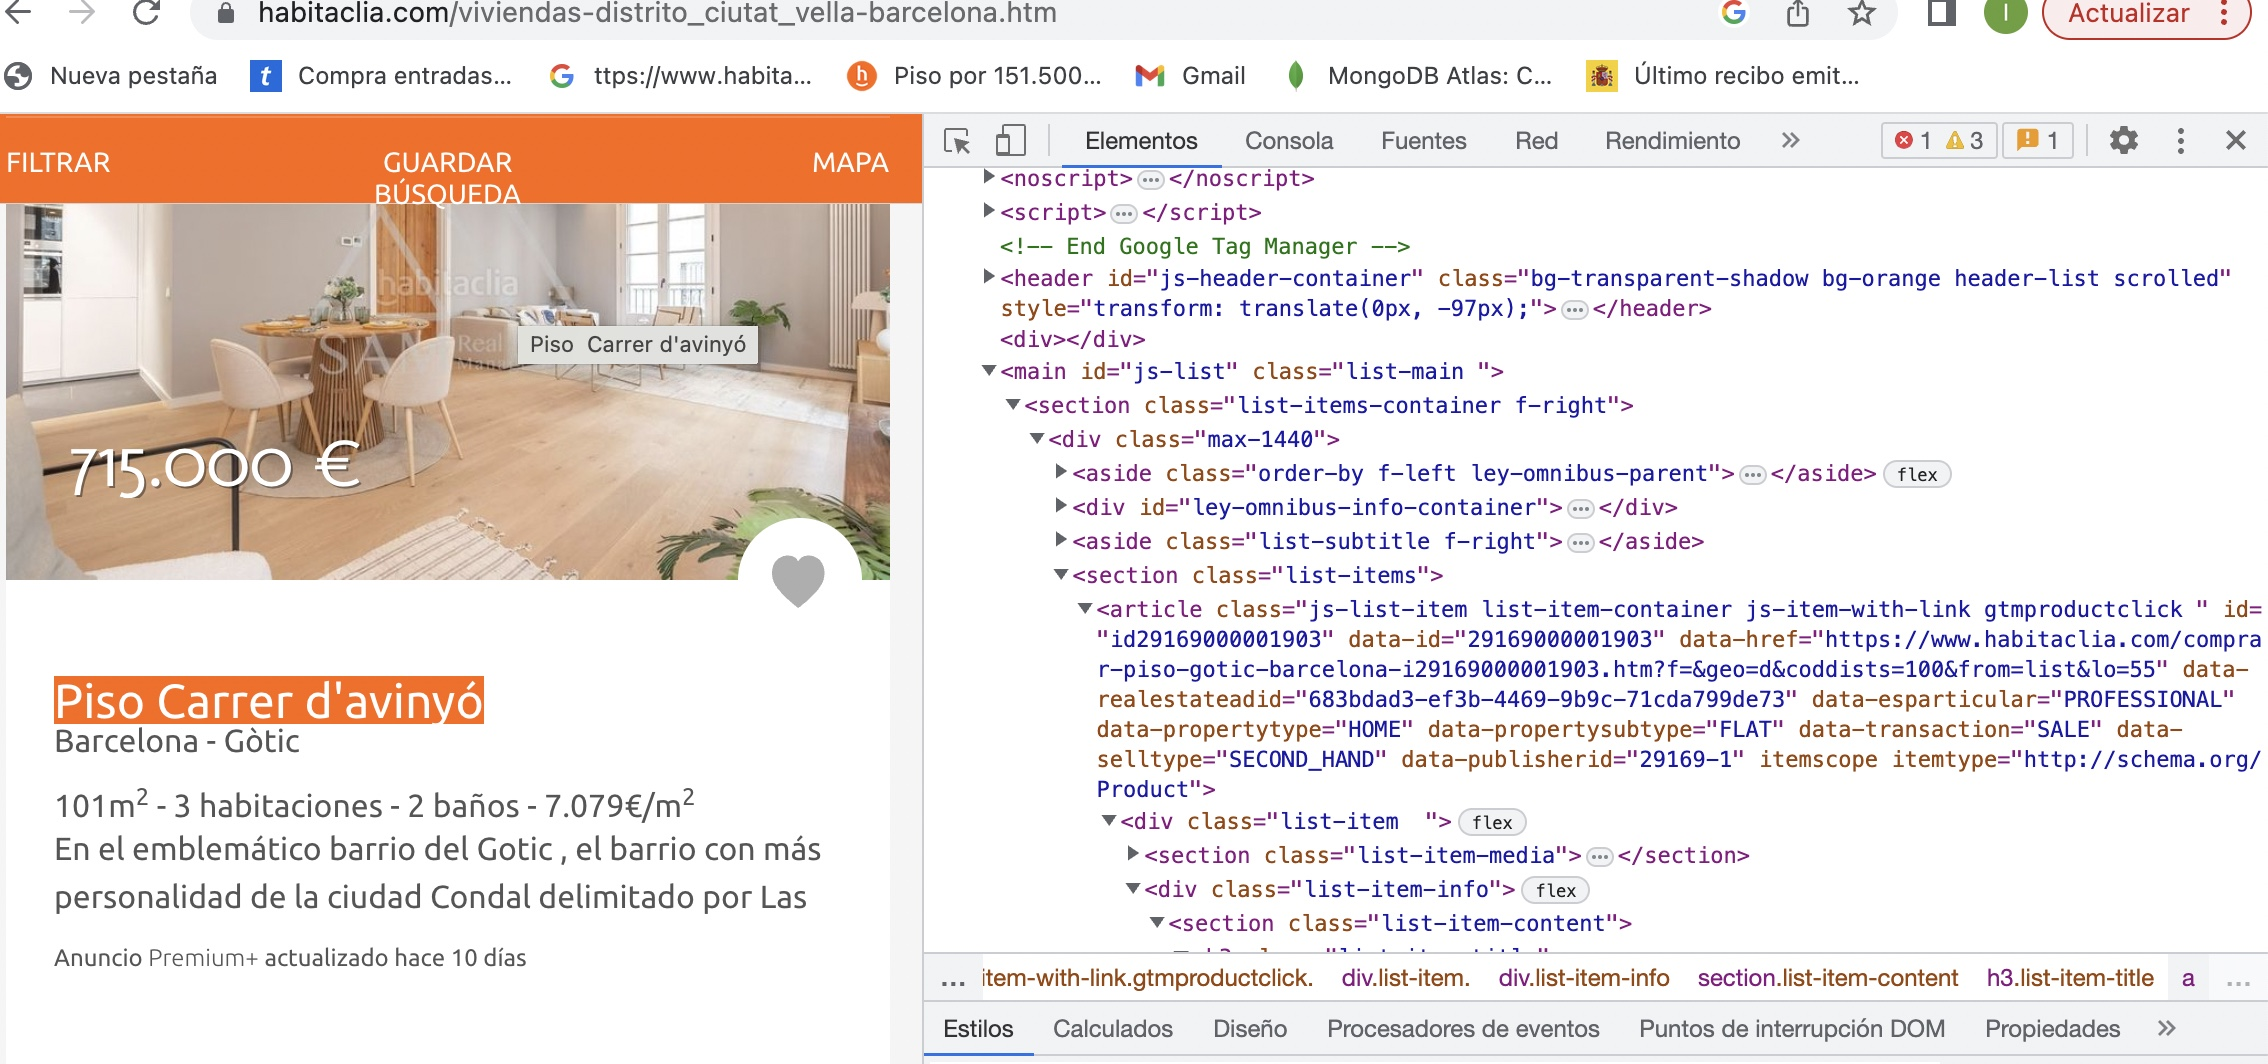

Al final de cada página nos encontramos con un link "Siguiente" el cual nos permite avanzar siendo cada página del tipo: https://www.habitaclia.com/viviendas-distrito_nombre_distrito-barcelona-index_de_la_página.htm.

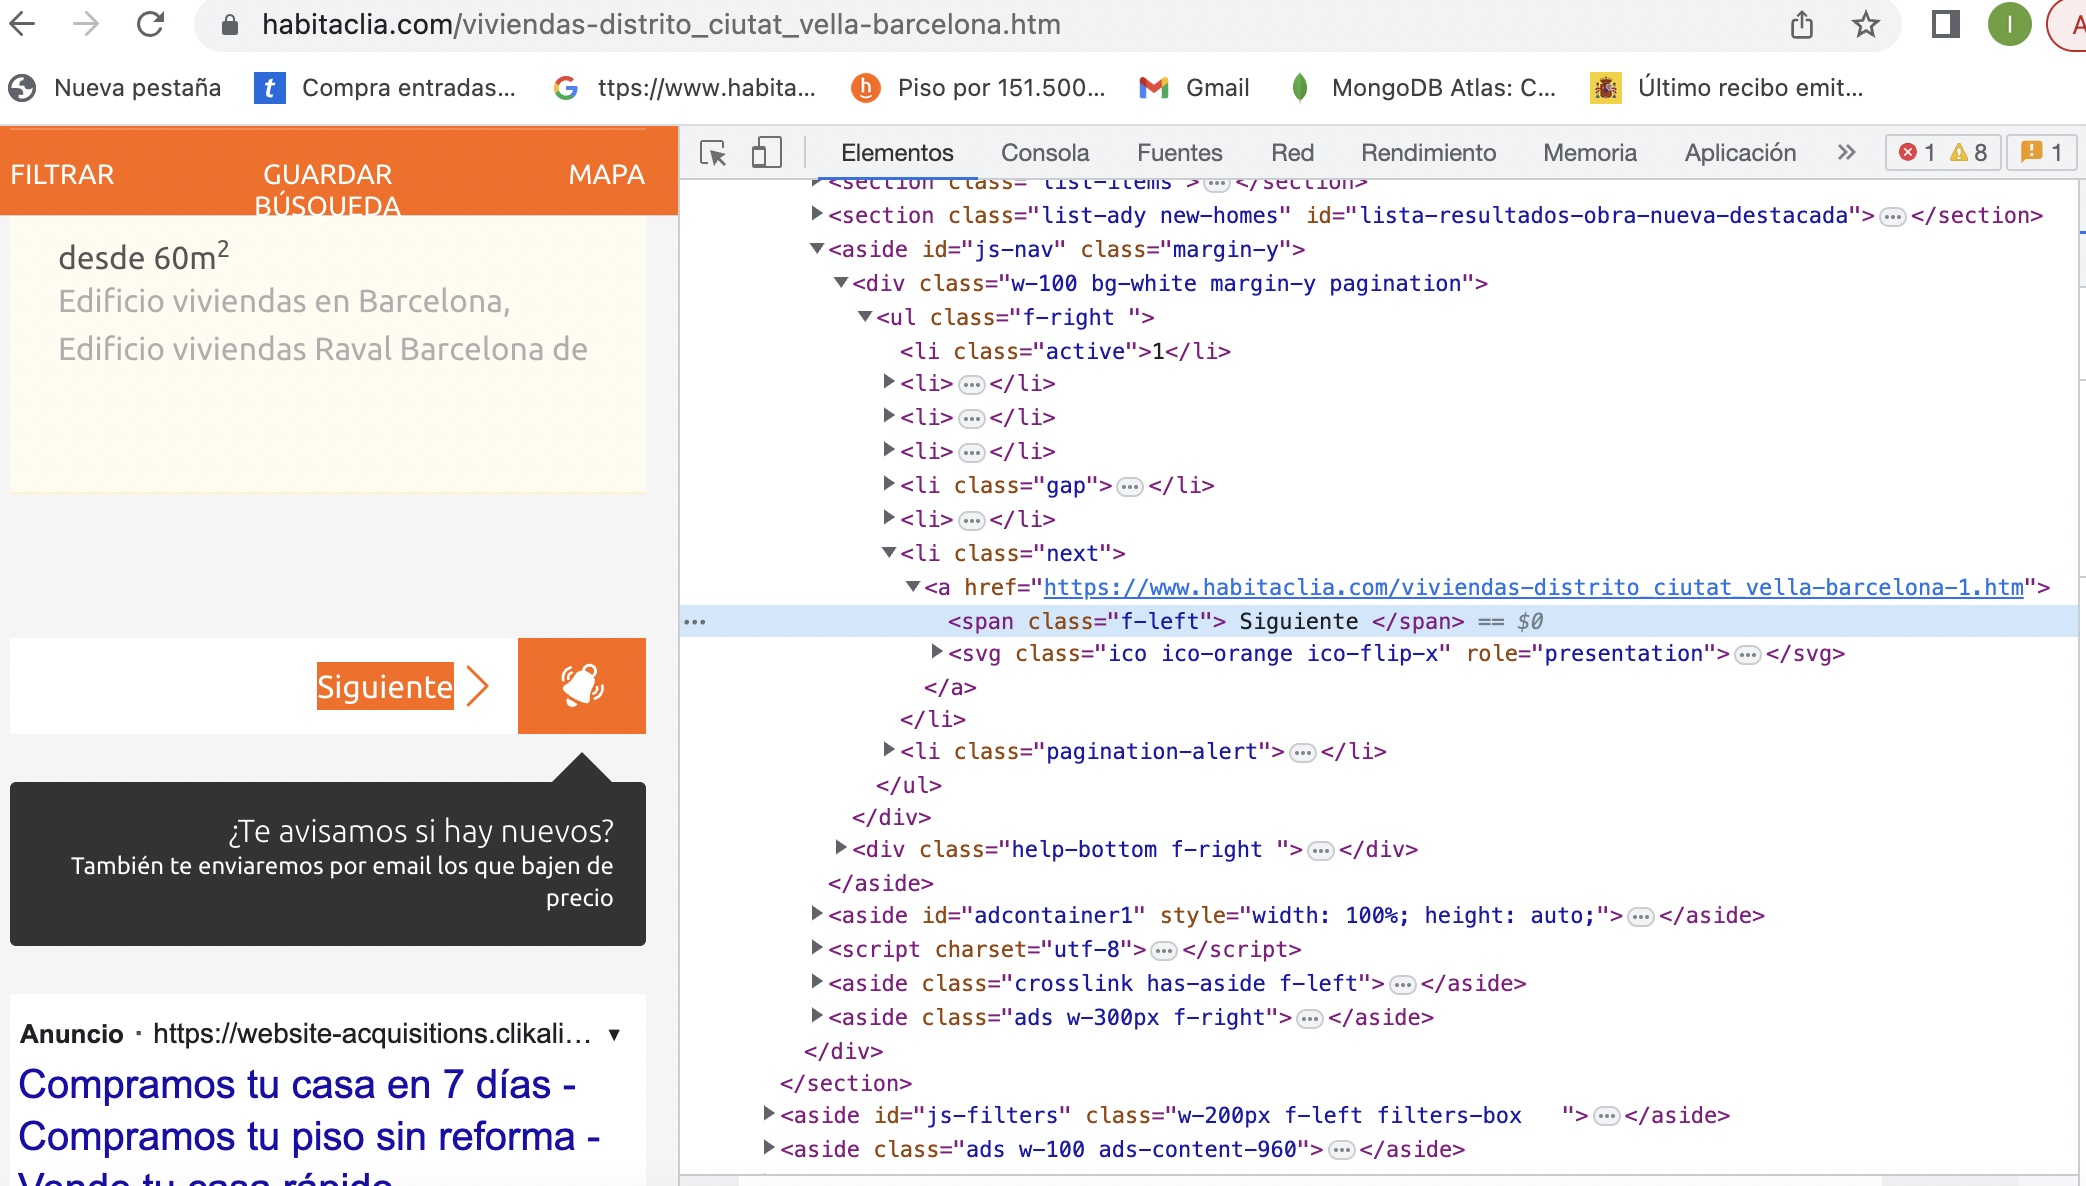

### Creación de la función extract_viviendas

Creamos la función que nos permite acceder a la información de cada vivienda anunciada para la url de cada distrito:

In [3]:
def extract_viviendas(url):
    driver.get(url)
    vivienda_divs = driver.find_elements(By.XPATH,"//section[@class='list-items']/article[contains(@class, 'list-item-container')]")
    viviendas = []
    for div in vivienda_divs:
        vivienda={}
        vivienda['id'] = div.get_attribute('id')
        vivienda['url'] = div.get_attribute('data-href')
        vivienda['subtype'] = div.get_attribute('data-propertysubtype')
        vivienda['transaction'] = div.get_attribute('data-transaction')
        vivienda['owner']=div.get_attribute('data-esparticular')
        vivienda['sell-type']=div.get_attribute('data-selltype')
        vivienda['provider']=div.get_attribute('data-publisherid')
        vivienda['title'] = div.find_element(By.XPATH, './/h3[@class="list-item-title"]').text
        vivienda['location'] = div.find_element(By.XPATH, './/p[@class="list-item-location"]').text
        vivienda['features'] = div.find_element(By.XPATH, './/p[@class="list-item-feature"]').text
        vivienda['description'] = div.find_element(By.XPATH,'.//p[@class="list-item-description"]').text
        vivienda['price'] = div.find_element(By.XPATH,'.//article[@class="list-item-price"]').text
        vivienda['price2'] = div.find_element(By.XPATH, ".//button[@data-source='lista']").get_attribute('data-pvp')
        vivienda['m2'] = div.find_element(By.XPATH, ".//button[@data-source='lista']").get_attribute('data-sup')
        vivienda['rooms'] = div.find_element(By.XPATH, ".//button[@data-source='lista']").get_attribute('data-hab')
        viviendas.append(vivienda)
    if driver.find_elements(By.CLASS_NAME,'next'):
        url=driver.find_element(By.XPATH,"//li[@class='next']/a").get_attribute('href')
        viviendas+=extract_viviendas(url)
    return viviendas

### Generación de los datasets 

Creamos los datasets con la información de las viviendas de cada distrito, y los guardamos en archivos de tipo CSV :

In [ ]:
Alquiler_Ciutat_Vella=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-distrito_ciutat_vella-barcelona.htm'))

In [ ]:
Alquiler_Ciutat_Vella.to_csv('Alquiler_Ciutat_Vella.csv',index=None)

In [ ]:
Comprar_Ciutat_Vella=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/viviendas-distrito_ciutat_vella-barcelona.htm'))

In [ ]:
Comprar_Ciutat_Vella.to_csv('Comprar_Ciutat_Vella.csv',index=None)

In [ ]:
Alquiler_Eixample=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-distrito_eixample-barcelona.htm'))

In [ ]:
Alquiler_Eixample.to_csv('Alquiler_Eixample.csv',index=None)

In [ ]:
Comprar_Eixample=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/viviendas-distrito_eixample-barcelona.htm'))

In [ ]:
Comprar_Eixample.to_csv('Comprar_Eixample.csv',index=None)

In [ ]:
Alquiler_Gracia=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-distrito_gracia-barcelona.htm'))

In [ ]:
Alquiler_Gracia.to_csv('Alquiler_Gracia.csv',index=None)

In [ ]:
Comprar_Gracia=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/viviendas-distrito_gracia-barcelona.htm'))

In [ ]:
Comprar_Gracia.to_csv('Comprar_Gracia.csv',index=None)

In [ ]:
Alquiler_Horta=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-distrito_horta_guinardo-barcelona.htm'))

In [ ]:
Alquiler_Horta.to_csv('Alquiler_Horta.csv',index=None)

In [ ]:
Comprar_Horta=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/viviendas-distrito_horta_guinardo-barcelona.htm'))

In [ ]:
Comprar_Horta.to_csv('Comprar_Horta.csv',index=None)

In [ ]:
Alquiler_Corts=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-distrito_les_corts-barcelona.htm'))

In [ ]:
Alquiler_Corts.to_csv('Alquiler_Corts.csv',index=None)

In [ ]:
Comprar_Corts=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/viviendas-distrito_les_corts-barcelona.htm'))

In [ ]:
Comprar_Corts.to_csv('Comprar_Corts.csv',index=None)

In [ ]:
Alquiler_Nou_Barris=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-distrito_nou_barris-barcelona.htm'))

In [ ]:
Alquiler_Nou_Barris.to_csv('Alquiler_Nou_Barris.csv',index=None)

In [ ]:
Comprar_Nou_Barris=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/viviendas-distrito_nou_barris-barcelona.htm'))

In [ ]:
Comprar_Nou_Barris.to_csv('Comprar_Nou_Barris.csv',index=None)

In [ ]:
Alquiler_Sant_Andreu=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-distrito_sant_andreu-barcelona.htm'))

In [ ]:
Alquiler_Sant_Andreu.to_csv('Alquiler_Sant_Andreu.csv',index=None)

In [ ]:
Comprar_Sant_Andreu=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/viviendas-distrito_sant_andreu-barcelona.htm'))

In [ ]:
Comprar_Sant_Andreu.to_csv('Comprar_Sant_Andreu.csv',index=None)

In [ ]:
Alquiler_Sant_Marti=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-distrito_sant_marti-barcelona.htm'))

In [ ]:
Alquiler_Sant_Marti.to_csv('Alquiler_Sant_Marti.csv',index=None)

In [ ]:
Comprar_Sant_Marti=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/viviendas-distrito_sant_marti-barcelona.htm'))

In [ ]:
Comprar_Sant_Marti.to_csv('Comprar_Sant_Marti.csv',index=None)

In [ ]:
Alquiler_Sants_Montjuic=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-distrito_sants_montjuic-barcelona.htm'))

In [ ]:
Alquiler_Sants_Montjuic.to_csv('Alquiler_Sants_Montjuic.csv',index=None)

In [ ]:
Alquiler_Sarria_Sant_Gervasi=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-distrito_sarria_sant_gervasi-barcelona.htm'))

In [ ]:
Alquiler_Sarria_Sant_Gervasi.to_csv('Alquiler_Sarria_Sant_Gervasi.csv',index=None)

In [ ]:
Comprar_Sarria_Sant_Gervasi=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/viviendas-distrito_sarria_sant_gervasi-barcelona.htm'))

In [ ]:
Comprar_Sarria_Sant_Gervasi.to_csv('Comprar_Sarria_Sant_Gervasi.csv',index=None)

In [ ]:
Comprar_Sants_Montjuic=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/viviendas-distrito_sants_montjuic-barcelona.htm'))

In [ ]:
Comprar_Sants_Montjuic.to_csv('Comprar_Sants_Montjuic.csv',index=None)

### Análisis de los datasets y sus variables

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

A modelo de ejemplo, analizaremos el dataset que contiene los datos realtivos las viviendas en alquiler en Barcelona Ciutat Vella :

In [5]:
Alquiler_Ciutat_Vella=pd.read_csv('Alquiler_Ciutat_Vella.csv')

In [6]:
Alquiler_Ciutat_Vella.head(3)

id  \
0  id2277003487234   
1  id3974003524929   
2  id1948004073754   

                                                                                                                                                                             url  \
0  https://www.habitaclia.com/alquiler-piso-de_100m2_con_dos_habitaciones_totalmente_amueblado_en_plaza_gotic-barcelona-i2277003487234.htm?f=&geo=d&coddists=100&from=list&lo=55   
1                                                              https://www.habitaclia.com/alquiler-piso-gotic-barcelona-i3974003524929.htm?f=&geo=d&coddists=100&from=list&lo=55   
2   https://www.habitaclia.com/alquiler-piso-con_2_habitaciones_amueblado_con_ascensor_calefaccion_y_ai_gotic-barcelona-i1948004073754.htm?f=&geo=d&coddists=100&from=list&lo=55   

  subtype transaction         owner    sell-type provider  \
0    FLAT        RENT  PROFESSIONAL  SECOND_HAND   2277-2   
1    FLAT        RENT  PROFESSIONAL  SECOND_HAND   3974-1   
2    FLAT        RENT  PROFESSIONAL  SECOND_HAND   1948-1   

                                                                                          title  \
0  Alquiler Piso Plaza del pí. Piso de 100m² con dos habitaciones totalmente amueblado en plaza   
1                                                              Alquiler Piso Carrer de la mercè   
2      Alquiler Piso en Gòtic. Piso con 2 habitaciones amueblado con ascensor, calefacción y ai   

            location                                      features  \
0  Barcelona - Gòtic  103m2 - 2 habitaciones - 2 baños - 19,42€/m2   
1  Barcelona - Gòtic   95m2 - 2 habitaciones - 2 baños - 20,00€/m2   
2  Barcelona - Gòtic    63m2 - 2 habitaciones - 1 baño - 33,33€/m2   

                                                                                                                   description  \
0    Piso de 100m² en Plaza del Pí con acceso a terraza comunitaria. La vivienda dispone de un amplio salón comedor exterio...   
1  EXCLUSIVIDAD - FINCA NUEVA - TERRAZA - PISCINA - WIFI - ALTO STANDING- Piso de 2 habitaciones en finca totalmente rehabi...   
2  Este apartamento cómodo de buenas dimensiones tiene todo lo que necesita para vivir en el casco antiguo de Barcelona. Ub...   

                                   price  price2   m2  rooms  
0  Oportunidad\n2.000 €\nha bajado 100 €    2000  103      2  
1               1.900 €\nha bajado 100 €    1900   95      2  
2                                2.100 €    2100   63      2

In [7]:
Alquiler_Ciutat_Vella.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           934 non-null    object
 1   url          934 non-null    object
 2   subtype      934 non-null    object
 3   transaction  934 non-null    object
 4   owner        934 non-null    object
 5   sell-type    934 non-null    object
 6   provider     934 non-null    object
 7   title        934 non-null    object
 8   location     934 non-null    object
 9   features     934 non-null    object
 10  description  934 non-null    object
 11  price        934 non-null    object
 12  price2       934 non-null    int64 
 13  m2           934 non-null    int64 
 14  rooms        934 non-null    int64 
dtypes: int64(3), object(12)
memory usage: 109.6+ KB


In [8]:
Alquiler_Ciutat_Vella.columns

Index(['id', 'url', 'subtype', 'transaction', 'owner', 'sell-type', 'provider',
       'title', 'location', 'features', 'description', 'price', 'price2', 'm2',
       'rooms'],
      dtype='object')

In [9]:
Alquiler_Ciutat_Vella['owner'].value_counts()

PROFESSIONAL    918
PRIVATE          16
Name: owner, dtype: int64

In [10]:
Alquiler_Ciutat_Vella['subtype'].value_counts()

FLAT         613
APARTMENT    248
PENTHOUSE     28
LOFT          20
STUDIO        18
DUPLEX         7
Name: subtype, dtype: int64

In [11]:
Alquiler_Ciutat_Vella['sell-type'].value_counts()

SECOND_HAND    934
Name: sell-type, dtype: int64

El set de datos Alquiler_Ciutat_Vella contiene información sobre el precio de 934 viviendas situadas en Barcelona, distrito de Ciutat Vella. Incluye 15 variables:

- id: identificador del anuncio
- url: link para acceder directamento a la ficha de la vivienda
- subtype: tipo de vivienda (flat, studio, penthouse, loft,etc...)
- transaction : tipo de transacción (rent or sale)
- owner: tipo de propietario (professional or private, normalmente professional en este portal)
- sell-type: tipo de operación (obra nueva o segunda mano)
- provider: identificador del anunciante (alphanumérico)
- title: título del anuncio
- location : nombre del barrio donde está ubicada la vivienda
- features: características de la vivienda (m2, nº de habitaciones, nº de baños, precio/m2)
- description: descripción más amplia de la vivienda
- price: precio de la vivienda con ciertos elementos de texto ('Oportunidad','Ha bajado')
- price2: precio en € en formato numérico
- m2: m2 en formato numérico
- rooms: nº de habitaciones en formato numérico


### Juntamos los datasets

In [ ]:
df_Alquiler=pd.concat([Alquiler_Ciutat_Vella,Alquiler_Eixample,Alquiler_Gracia,Alquiler_Horta,Alquiler_Corts,Alquiler_Nou_Barris,
Alquiler_Sant_Andreu,Alquiler_Sant_Marti,Alquiler_Sants_Montjuic,Alquiler_Sarria_Sant_Gervasi],ignore_index=True)

In [ ]:
df_Comprar=pd.concat([Comprar_Ciutat_Vella,Comprar_Eixample,Comprar_Gracia,Comprar_Horta,Comprar_Corts,Comprar_Nou_Barris,
Comprar_Sant_Andreu,Comprar_Sant_Marti,Comprar_Sants_Montjuic,Comprar_Sarria_Sant_Gervasi],ignore_index=True)

In [ ]:
df_Alquiler.to_csv('df_Alquiler.csv')

In [ ]:
df_Comprar.to_csv('df_Comprar.csv')

In [12]:
df_Alquiler=pd.read_csv('df_Alquiler.csv')

In [13]:
df_Alquiler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4486 entries, 0 to 4485
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4486 non-null   int64 
 1   id           4486 non-null   object
 2   url          4486 non-null   object
 3   subtype      4486 non-null   object
 4   transaction  4486 non-null   object
 5   owner        4486 non-null   object
 6   sell-type    4486 non-null   object
 7   provider     4486 non-null   object
 8   title        4486 non-null   object
 9   location     4486 non-null   object
 10  features     4486 non-null   object
 11  description  4486 non-null   object
 12  price        4482 non-null   object
 13  price2       4486 non-null   int64 
 14  m2           4486 non-null   int64 
 15  rooms        4486 non-null   int64 
dtypes: int64(4), object(12)
memory usage: 560.9+ KB


In [14]:
df_Comprar=pd.read_csv('df_Comprar.csv')

In [15]:
df_Comprar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18753 entries, 0 to 18752
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18753 non-null  int64 
 1   id           18753 non-null  object
 2   url          18753 non-null  object
 3   subtype      18753 non-null  object
 4   transaction  18753 non-null  object
 5   owner        18753 non-null  object
 6   sell-type    18753 non-null  object
 7   provider     18753 non-null  object
 8   title        18753 non-null  object
 9   location     18753 non-null  object
 10  features     18752 non-null  object
 11  description  18753 non-null  object
 12  price        18723 non-null  object
 13  price2       18753 non-null  int64 
 14  m2           18753 non-null  int64 
 15  rooms        18753 non-null  int64 
dtypes: int64(4), object(12)
memory usage: 2.3+ MB


## Scrapear propiedades amuebladas y con parking

El hecho de que una vivienda tenga parking o no, sea amueblada o no (caso del alquiler), con toda seguridad tendrá un impacto en el precio.

Estas características no aparecen en el listado de viviendas por distrito, solamente aparecen en la ficha de cada anuncio, que como ya hemos comentado anteriormente no nos planteamos scrapear dado el volumen de información.

Existe no obstante la posibilidad de filtrar las viviendas por estas características :

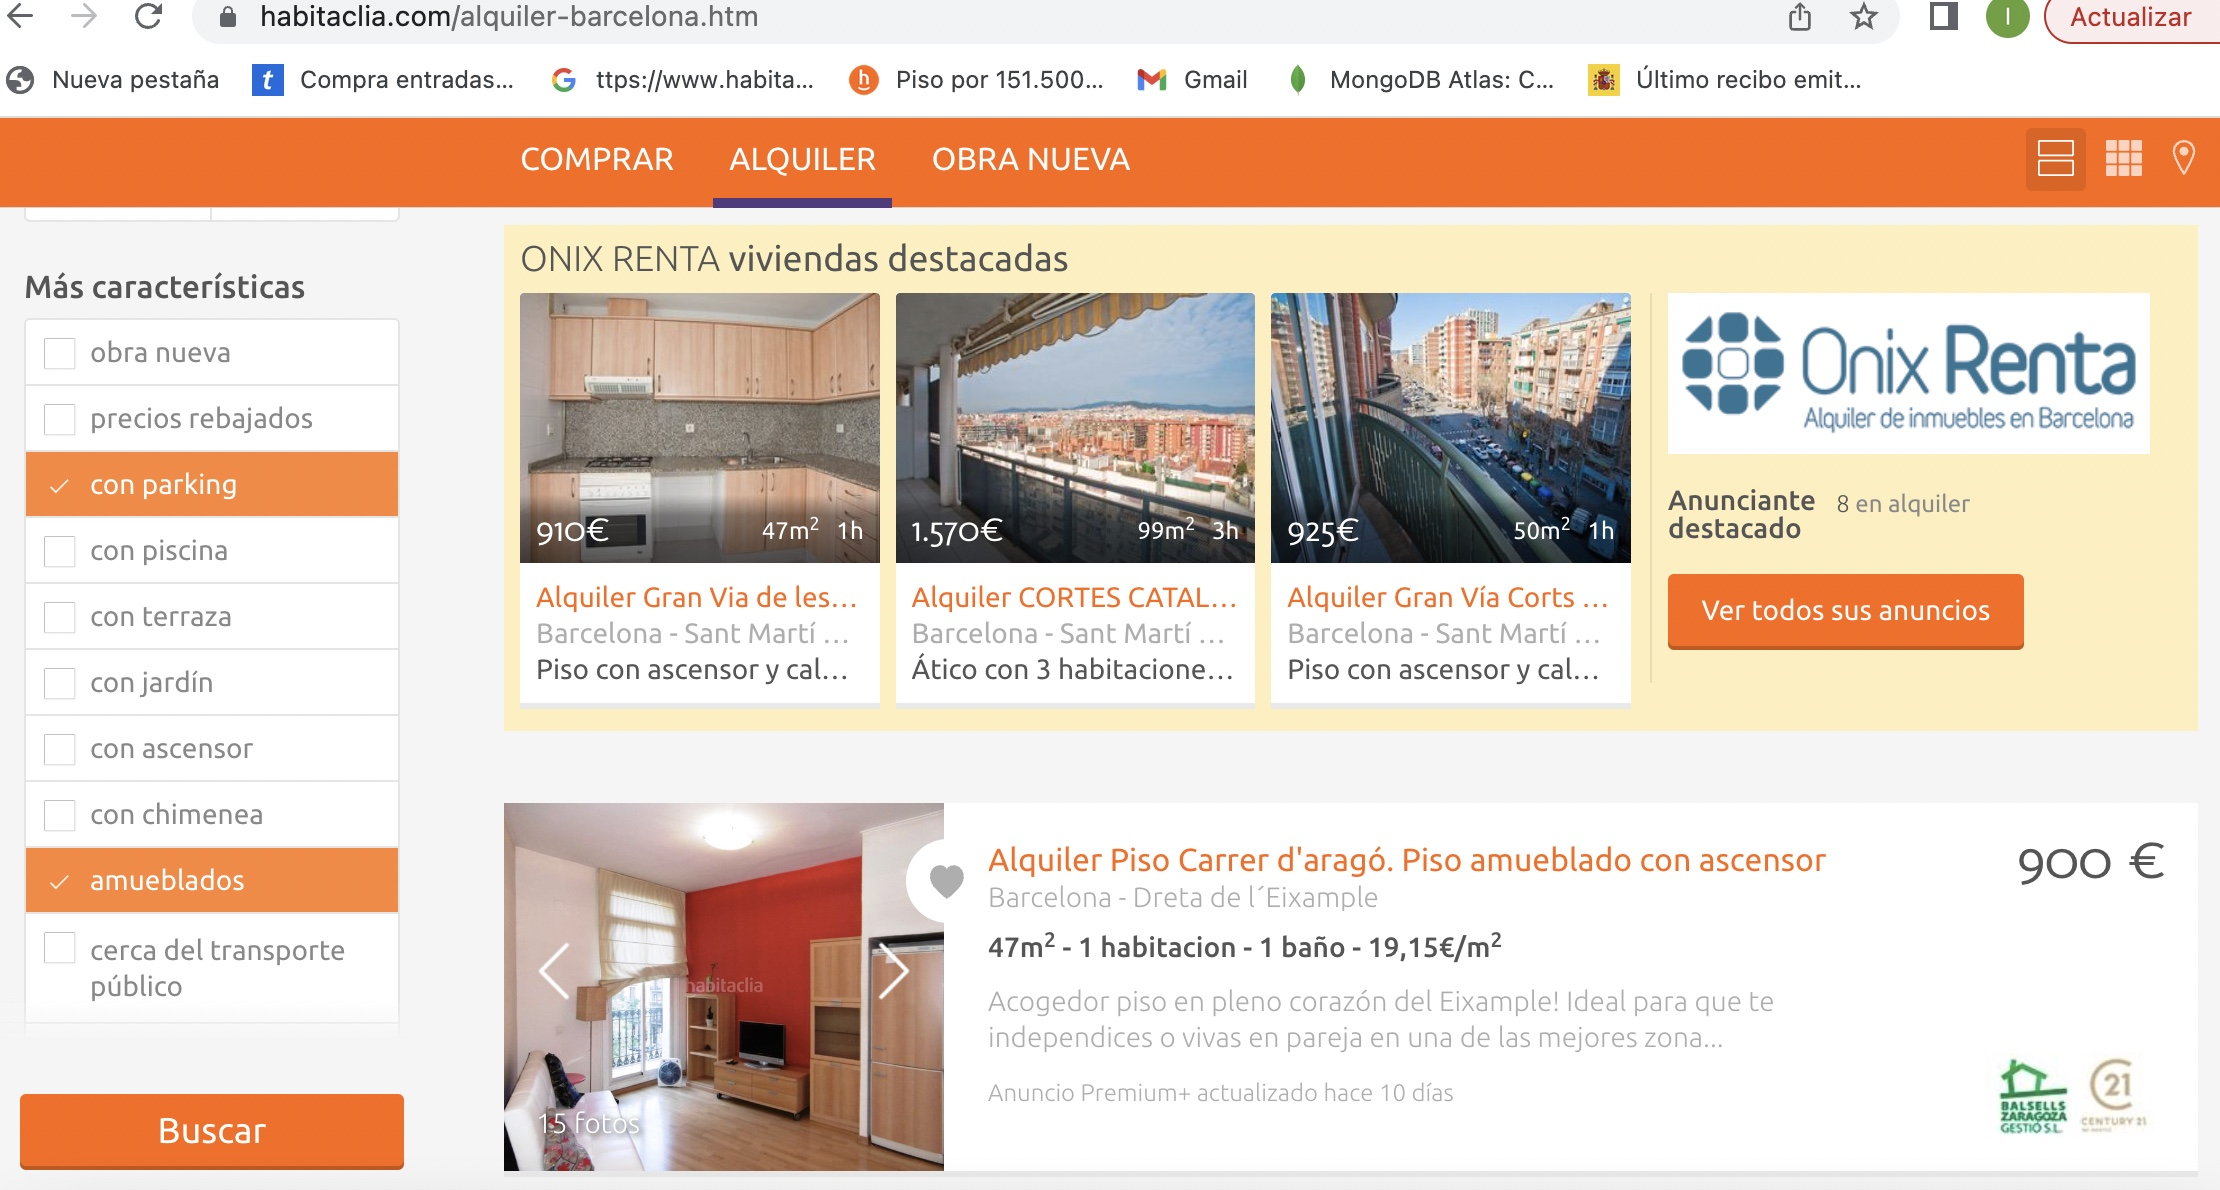

### Generación de los datasets

Usamos la función extract_viviendas para generar los datasets:

In [ ]:
Comprar_Parking=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/viviendas-parking-barcelona.htm'))

In [ ]:
Comprar_Parking.to_csv('Comprar_Parking.csv',index=None)

In [ ]:
Alquiler_Parking=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-viviendas-parking-barcelona.htm'))


In [ ]:
Alquiler_Parking.to_csv('Alquiler_Parking.csv',index=None)

In [ ]:
Alquiler_Amueblado=pd.DataFrame(extract_viviendas('https://www.habitaclia.com/alquiler-viviendas-amueblado-barcelona.htm'))


In [ ]:
Alquiler_Amueblado.to_csv('Alquiler_Amueblado.csv',index=None)

In [21]:
Comprar_Parking=pd.read_csv('Comprar_Parking.csv')

In [22]:
Comprar_Parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2011 non-null   object
 1   url          2011 non-null   object
 2   subtype      2011 non-null   object
 3   transaction  2011 non-null   object
 4   owner        2011 non-null   object
 5   sell-type    2011 non-null   object
 6   provider     2011 non-null   object
 7   title        2011 non-null   object
 8   location     2011 non-null   object
 9   features     2011 non-null   object
 10  description  2011 non-null   object
 11  price        2003 non-null   object
 12  price2       2011 non-null   int64 
 13  m2           2011 non-null   int64 
 14  rooms        2011 non-null   int64 
dtypes: int64(3), object(12)
memory usage: 235.8+ KB


In [23]:
Alquiler_Parking=pd.read_csv('Alquiler_Parking.csv')

In [24]:
Alquiler_Parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           436 non-null    object
 1   url          436 non-null    object
 2   subtype      436 non-null    object
 3   transaction  436 non-null    object
 4   owner        436 non-null    object
 5   sell-type    436 non-null    object
 6   provider     436 non-null    object
 7   title        436 non-null    object
 8   location     436 non-null    object
 9   features     436 non-null    object
 10  description  436 non-null    object
 11  price        434 non-null    object
 12  price2       436 non-null    int64 
 13  m2           436 non-null    int64 
 14  rooms        436 non-null    int64 
dtypes: int64(3), object(12)
memory usage: 51.2+ KB


In [25]:
Alquiler_Amueblado=pd.read_csv('Alquiler_Amueblado.csv')

In [26]:
Alquiler_Amueblado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2588 non-null   object
 1   url          2588 non-null   object
 2   subtype      2588 non-null   object
 3   transaction  2588 non-null   object
 4   owner        2588 non-null   object
 5   sell-type    2588 non-null   object
 6   provider     2588 non-null   object
 7   title        2588 non-null   object
 8   location     2588 non-null   object
 9   features     2588 non-null   object
 10  description  2588 non-null   object
 11  price        2586 non-null   object
 12  price2       2588 non-null   int64 
 13  m2           2588 non-null   int64 
 14  rooms        2588 non-null   int64 
dtypes: int64(3), object(12)
memory usage: 303.4+ KB


## Convertir las url en clicable

Con tal de poder acceder desde cada dataset a la ficha de las viviendas de nuestra interés, podemos convertir las urls en clicables.

Creamos la función que nos permite realizar esta conversión :

In [28]:
def make_clickable(val):
    return f'<a target="_blank" href="{val}">{val}</a>'

A modo de ejemplo aplicamos la función make_clickable al dataset Alquiler_Ciutat_Vella

In [31]:
Alquiler_Ciutat_Vella.style.format({'url': make_clickable})

## Conclusión

Hemos generado 5 datasets guardados en formato CSV :

- df_Alquiler.csv
- df_Comprar.csv
- Alquiler_Parking.csv
- Comprar_Parking.csv
- Alquiler_Amueblado.csv

En el Notebook exploración_datasets nos planteamos analizar en prfundidad la información y realizar las operaciones necesarias para obtener 2 datasets, uno para cada tipo de transacción, limpios y con las variables necesarias para aplicar modelos de machine learning.
